## **JUNAID JAVED**
### **GRIP - THE SPARKS FOUNDATION**
### **INTERN AS DATA SCIENCE AND BUSINESS ANALYTICS**
### **TASK 5-EXPLORATORY DATA ANALYSIS - SPORTS**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

### **Objective:**
   #### **As a sports analysts, find out the most successful teams, players and factors contributing in win or loss.**
   #### **suggest teams or players to a company should endorse for its product.**

In [2]:
df_matches = pd.read_csv('matches.csv')
df_deliveries = pd.read_csv('deliveries.csv')

In [4]:
rows_matches, cols_matches = df_matches.shape 
rows_deliveries, cols_deliveries = df_deliveries.shape

print('\nNumber of rows in matches df:= ',rows_matches)
print('Number of columns in matches df:= ',cols_matches)


print('\nNumber of rows in score df:= ',rows_deliveries)
print('Number of columns in deliveries df:= ',cols_deliveries)


Number of rows in matches df:=  756
Number of columns in matches df:=  18

Number of rows in score df:=  179078
Number of columns in deliveries df:=  21


In [44]:
df_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [45]:
df_deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [46]:
# DATA Structure of df_matches
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# DATA Structure of df_deliveries

df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
# percentage calculation of missing value:
df_matches.isnull().sum() / df_matches.shape[0]*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [11]:
# percentage calculation of missing value in deliveries dataset:
df_deliveries.isnull().sum() / df_deliveries.shape[0]*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [13]:
# total  calculation of missing value in dataset:
df_matches.isnull().sum().sum()

656

In [18]:
# total  calculation of missing value in dataset deliveries:
df_deliveries.isnull().sum().sum()

513118

In [20]:
# Matches we have got in the dataset 
df_matches['id'].max()

11415

In [21]:
 # Total seasons in data set
 df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

##### Team won by Maximum runs

In [22]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [23]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

#### Team won by maximum wickets

In [24]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Team won by minimum runs

In [25]:
df_matches.iloc[df_matches[df_matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

#### Team won by Minimum Wickets

In [28]:
df_matches.iloc[df_matches[df_matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [29]:
df_matches.iloc[df_matches[df_matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

#### Observation:
  1. Mumbai indians is the team which won by maximum and minimum runs
  2. Kolkata Knight Riders is the team which won by maximum and minimum wickets

#### Season Which had most number of matches

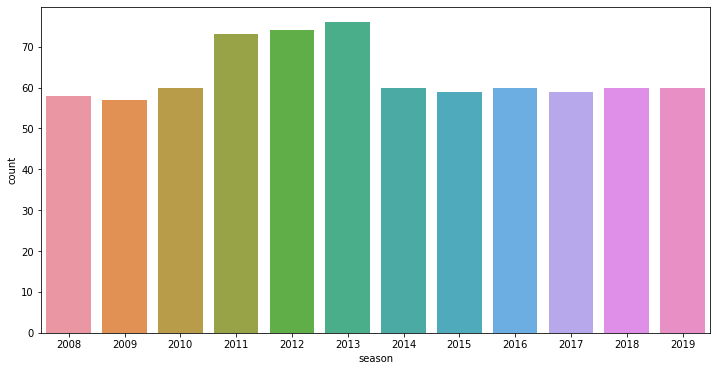

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data = df_matches)
plt.show()

#### We analysed that in 2013, we have the most number of matches

<AxesSubplot:xlabel='winner'>

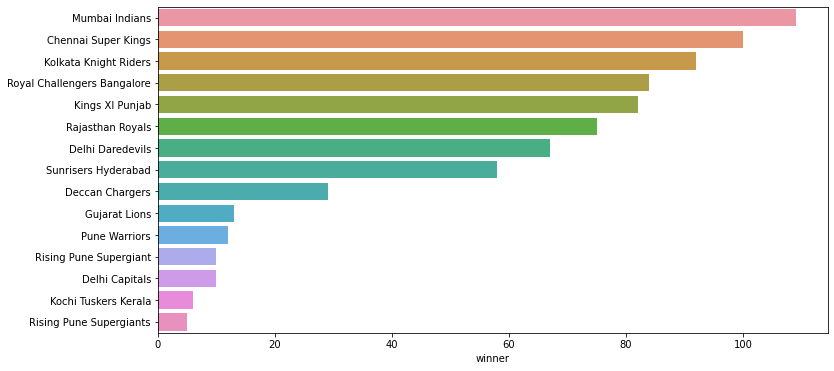

In [31]:
plt.figure(figsize=(12,6))
data = df_matches.winner.value_counts()
sns.barplot(y= data.index, x = data, orient='h')


#### Top Player Of the match


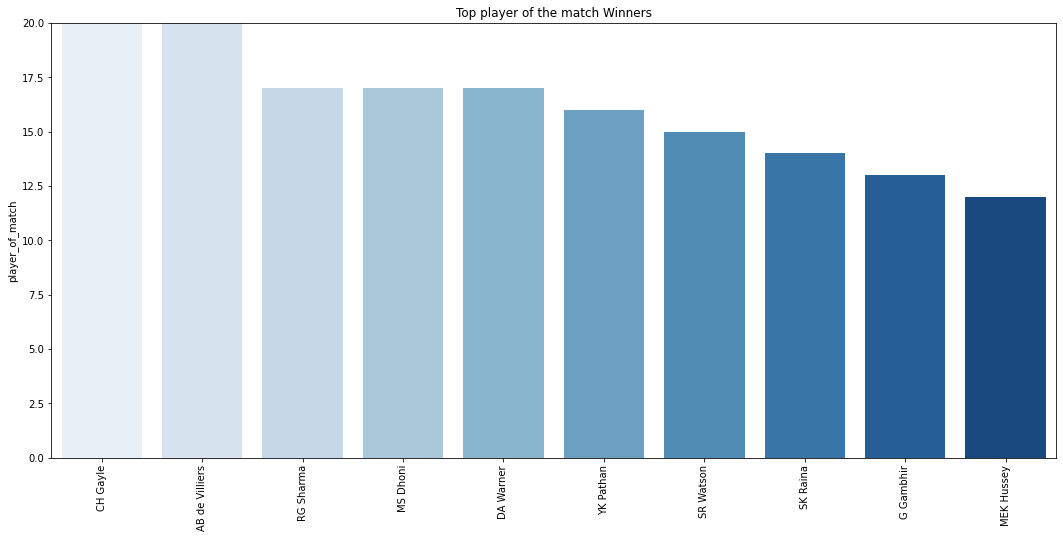

In [33]:
top_players = df_matches.player_of_match.value_counts()[:10]

fig,ax = plt.subplots(figsize=(18,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y=top_players , orient='v', palette="Blues")
plt.show()

### Number of matches played by each team:

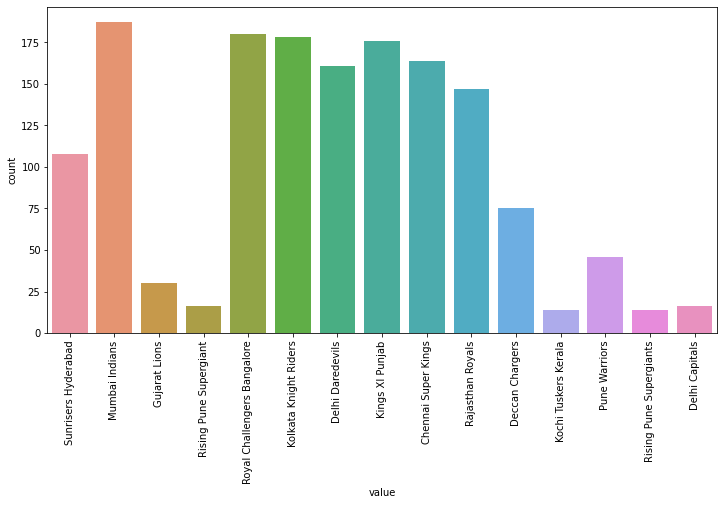

In [34]:
temp_df = pd.melt(df_matches , id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

##### **Mumbai Indians** lead the pack with most number of matches played followed by **Royal Challengers Bangalore**. There are also teams with very few matches like **Rising Pune Supergiants, Gujarat Lions** as they are new teams that came in only last season.

#### Champions of each season:

In [41]:
df_temp = df_matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop = True)
df_temp

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### The team that won the most number of toss

In [42]:
toss_ser = df_matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 
toss_df


C:\Users\Dr. Ajay Kumar\AppData\Local\Temp\ipykernel_11920\1796156777.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toss_df = toss_df.append(temp_df3, ignore_index=True)


,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


<AxesSubplot:title={'center':'How IPL Teams fared in toss?'}, xlabel='wins', ylabel='team'>

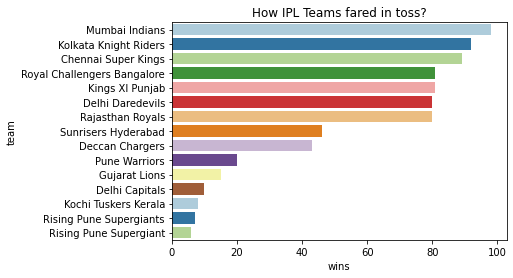

In [43]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired')

#### Observations:
 1. Mumbai Indians has won the most toss(till 2019) in IPL history.
 2.  All the top teams in IPL are successful in winning the toss as well.

#### **Suggestions according to observations**
##### **Teams--- Mumbai Indians, Chennai Super Kings , Kolkata Knight Riders & Royal challangers Bangalore**
##### **Players --- Virat Kohli , Chriss Gayle , RG Sharma & Ms Dhoni**
##### **Factors---- Feilding , Players Performance and Toss Wins chance affeting the Match win percentage**

 #### **A company should endorse for its product to above mentioned teams and players.**

##                      **THANKYOU***